<a href="https://colab.research.google.com/github/stepsbtw/pokestatistica/blob/main/pokestatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
#importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [80]:
# criando o dataframe
df = pd.read_csv('dataset/pokemon.csv')
df
# temos um "problema" -> a altura e o peso tao em unidade americana.

,id,ndex,species,forme,type1,type2,ability1,ability2,abilityH,hp,...,weight,height,dex1,dex2,class,percent-male,percent-female,pre-evolution,egg-group1,egg-group2
0,1,1,Bulbasaur,Bulbasaur,Grass,Poison,Overgrow,NaN,Chlorophyll,45,...,15.2 lbs.,"2'04""",NaN,NaN,Seed Pokémon,0.875,0.125,NaN,Monster,Grass
1,2,2,Ivysaur,Ivysaur,Grass,Poison,Overgrow,NaN,Chlorophyll,60,...,28.7 lbs.,"3'03""",NaN,NaN,Seed Pokémon,0.875,0.125,Bulbasaur,Monster,Grass
2,3,3,Venusaur,Venusaur,Grass,Poison,Overgrow,NaN,Chlorophyll,80,...,220.5 lbs.,"6'07""",NaN,NaN,Seed Pokémon,0.875,0.125,Ivysaur,Monster,Grass
3,4,4,Charmander,Charmander,Fire,NaN,Blaze,NaN,Solar Power,39,...,18.7 lbs.,"2'00""",NaN,NaN,Lizard Pokémon,0.875,0.125,NaN,Monster,Dragon
4,5,5,Charmeleon,Charmeleon,Fire,NaN,Blaze,NaN,Solar Power,58,...,41.9 lbs.,"3'07""",NaN,NaN,Flame Pokémon,0.875,0.125,Charmander,Monster,Dragon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,1058,778,Mimikyu,Mimikyu (Busted Form),Ghost,Fairy,Disguise,Disguise,Disguise,60,...,1.5 lbs.,"0'08""",After going to all the effort of disguising it...,If its neck is broken or its rag torn during a...,Disguise Pokémon,0.500,0.500,NaN,Amorphous,NaN
1057,1059,778,Mimikyu,Mimikyu (2),Ghost,Fairy,Disguise,Disguise,Disguise,60,...,1.5 lbs.,"0'08""",NaN,NaN,Disguise Pokémon,0.500,0.500,NaN,Amorphous,NaN
1058,1060,778,Mimikyu,Mimikyu (3),Ghost,Fairy,Disguise,Disguise,Disguise,60,...,1.5 lbs.,"0'08""",NaN,NaN,Disguise Pokémon,0.500,0.500,NaN,Amorphous,NaN
1059,1061,784,Kommo-o,Kommo-o (1),Dragon,Fighting,Bulletproof,Soundproof,Overcoat,75,...,172.4 lbs.,"5'03""",NaN,NaN,Scaly Pokémon,0.500,0.500,NaN,Dragon,NaN


In [81]:
# por enquanto nao quero usar as 26 colunas
df.columns

Index(['id', 'ndex', 'species', 'forme', 'type1', 'type2', 'ability1',
       'ability2', 'abilityH', 'hp', 'attack', 'defense', 'spattack',
       'spdefense', 'speed', 'total', 'weight', 'height', 'dex1', 'dex2',
       'class', 'percent-male', 'percent-female', 'pre-evolution',
       'egg-group1', 'egg-group2'],
      dtype='object')

In [82]:
# entao tirei as que eu achei paia
df = df.drop(columns=['id','ability1','ability2','abilityH','percent-male','percent-female','egg-group1','egg-group2','class','dex1','dex2'])
df

,ndex,species,forme,type1,type2,hp,attack,defense,spattack,spdefense,speed,total,weight,height,pre-evolution
0,1,Bulbasaur,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,15.2 lbs.,"2'04""",NaN
1,2,Ivysaur,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,28.7 lbs.,"3'03""",Bulbasaur
2,3,Venusaur,Venusaur,Grass,Poison,80,82,83,100,100,80,525,220.5 lbs.,"6'07""",Ivysaur
3,4,Charmander,Charmander,Fire,NaN,39,52,43,60,50,65,309,18.7 lbs.,"2'00""",NaN
4,5,Charmeleon,Charmeleon,Fire,NaN,58,64,58,80,65,80,405,41.9 lbs.,"3'07""",Charmander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,778,Mimikyu,Mimikyu (Busted Form),Ghost,Fairy,60,100,60,100,60,120,500,1.5 lbs.,"0'08""",NaN
1057,778,Mimikyu,Mimikyu (2),Ghost,Fairy,60,100,60,100,60,120,500,1.5 lbs.,"0'08""",NaN
1058,778,Mimikyu,Mimikyu (3),Ghost,Fairy,60,100,60,100,60,120,500,1.5 lbs.,"0'08""",NaN
1059,784,Kommo-o,Kommo-o (1),Dragon,Fighting,75,110,125,100,105,85,600,172.4 lbs.,"5'03""",NaN


## Análise exploratória
### 1) Distribuição, dispersão e tendência dos STATS

In [83]:
# pra facilitar a analise criei um df temporario so com as colunas de status
stats = ['hp', 'attack', 'defense', 'spattack', 'spdefense', 'speed', 'total']
df[stats]
# problema: weight e height sao strings e da um pouco mais de trabalho

,hp,attack,defense,spattack,spdefense,speed,total
0,45,49,49,65,65,45,318
1,60,62,63,80,80,60,405
2,80,82,83,100,100,80,525
3,39,52,43,60,50,65,309
4,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...
1056,60,100,60,100,60,120,500
1057,60,100,60,100,60,120,500
1058,60,100,60,100,60,120,500
1059,75,110,125,100,105,85,600


In [84]:
descricao = df[stats].describe()
descricao

# count -> so p saber q tem 1061 pokemons
# mean -> media de cada stat ! muito legal
# std -> desvio padrao de cada stat ! muito legal
# min -> minimo de cada stat ! ATENCAO outlier!
# 25% -> primeiro quartil, 75% vao ter + stats que isso
# 50% -> segundo quartil, mediana!
# 75% -> terceiro quartil, somente 25% tem + stats que isso
# max -> maximo de cada stat ! ATENCAO outlier!

,hp,attack,defense,spattack,spdefense,speed,total
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000
mean,70.041470,79.602262,73.730443,74.550424,72.911404,70.321395,441.157399
std,25.893508,31.378369,30.394899,31.975146,27.995681,29.328288,121.289505
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
25%,50.000000,55.000000,50.000000,50.000000,50.000000,48.000000,336.000000
50%,68.000000,75.000000,70.000000,70.000000,70.000000,68.000000,455.000000
75%,80.000000,100.000000,91.000000,95.000000,90.000000,93.000000,520.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,780.000000


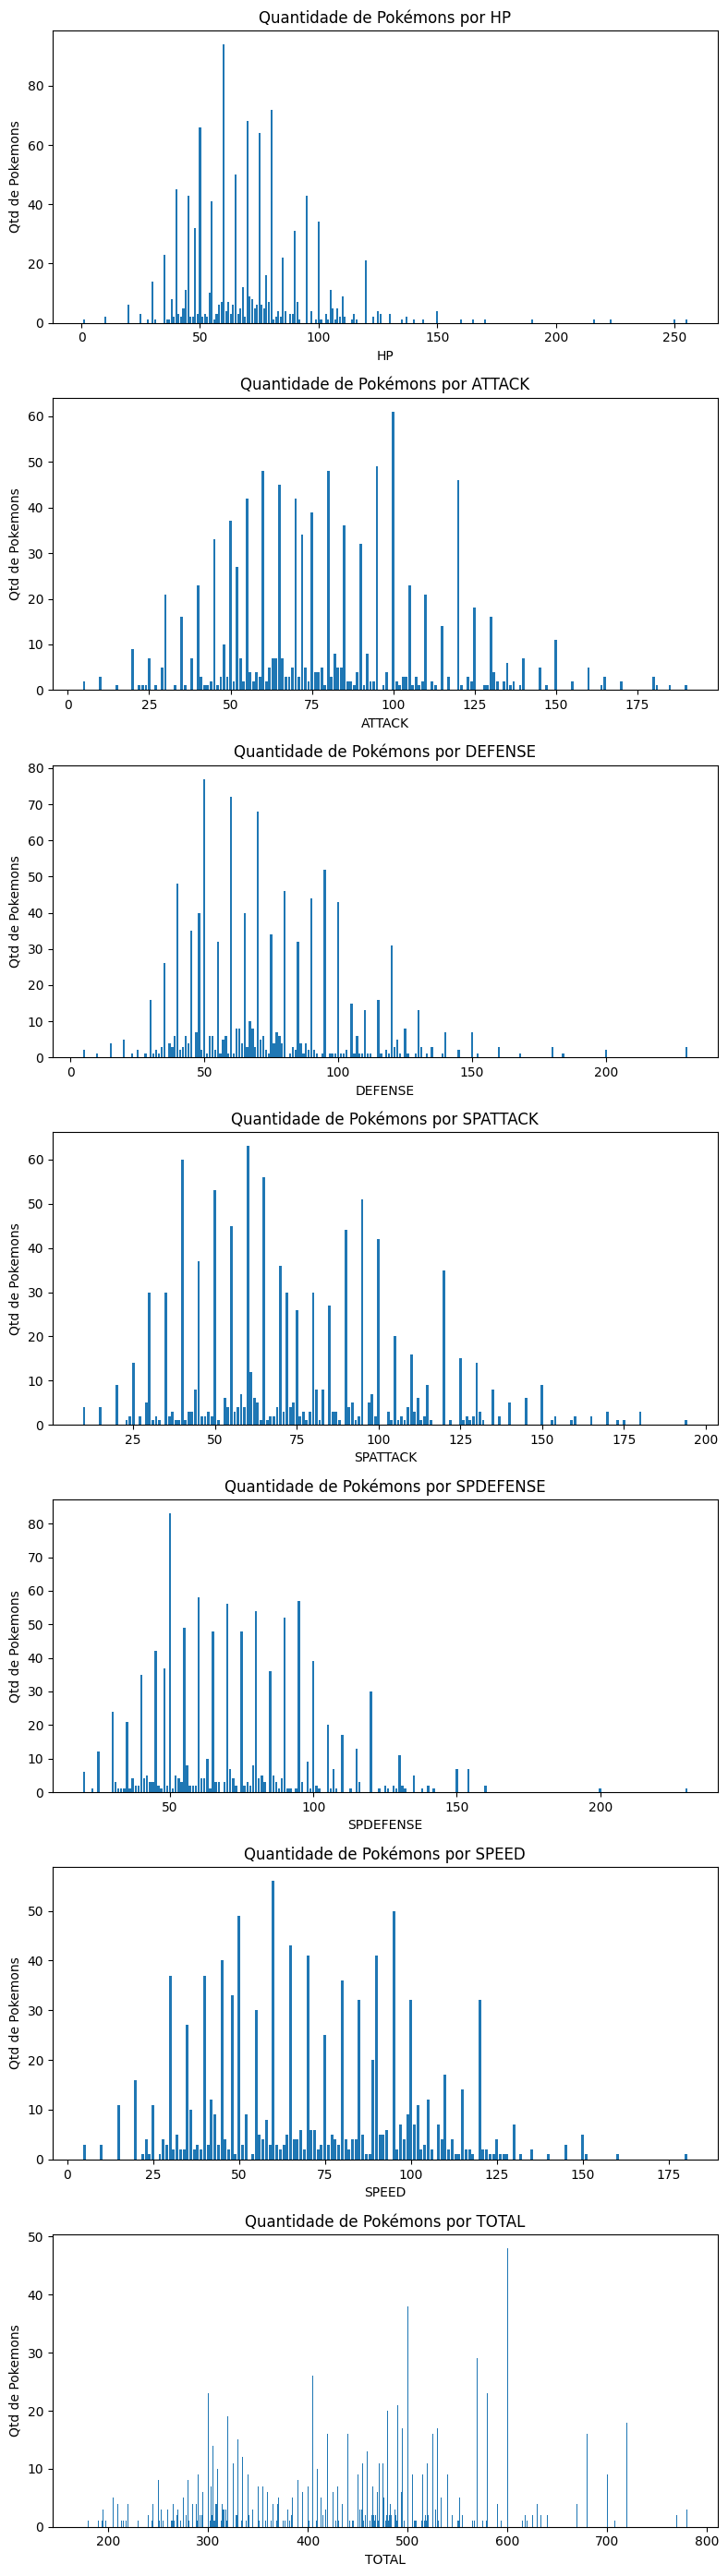

In [85]:
# Dividir em classes! Pra cada atributo, plotar a distribuicao!
'''
for stat in stats:
  Fi = df[stat].value_counts()
  plt.bar(Fi.index, Fi.values)
  plt.xlabel(stat)
  plt.ylabel('Qtd de Pokemons')
  plt.title(f'Quantidade de Pokémons por {stat}')
  plt.show()
'''

fig, axes = plt.subplots(nrows = len(stats), ncols=1, figsize=(8, 4 * len(stats)))
# subplots
for i, stat in enumerate(stats):
    Fi = df[stat].value_counts()
    axes[i].bar(Fi.index, Fi.values)
    axes[i].set_xlabel(stat.upper())
    axes[i].set_ylabel('Qtd de Pokemons')
    axes[i].set_title(f'Quantidade de Pokémons por {stat.upper()}')

plt.tight_layout()
plt.show()


Pergunta: ok, mas iai. ainda nao to tendo muitos insights. A média é representativa? quem sao os outliers?

### 2) Boxplots dos STATS
   -> pra analise fazer sentido, sem ter que ficar calculando assimetria dispersao um monte de coisa, so vamos dar um jeito de plotar!
   -> grafico de dispersao pode ficar legal!

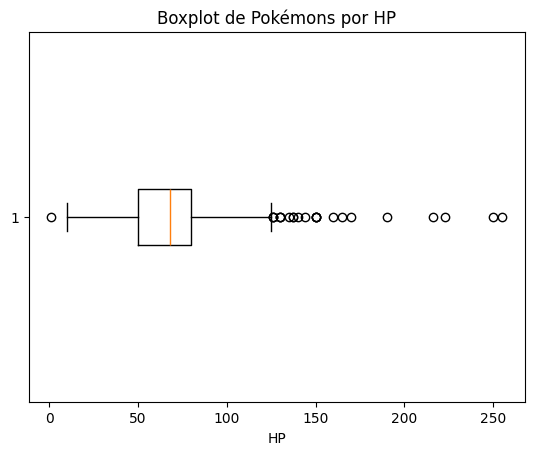

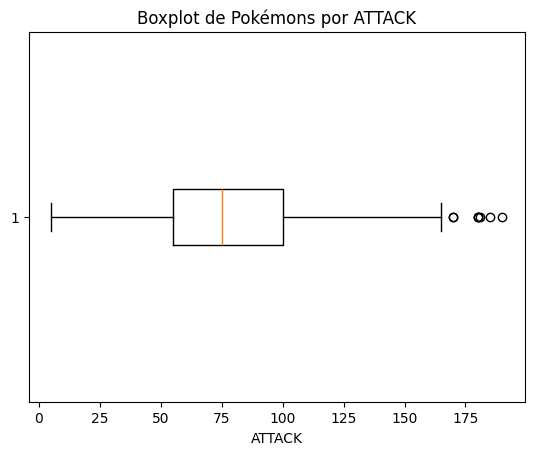

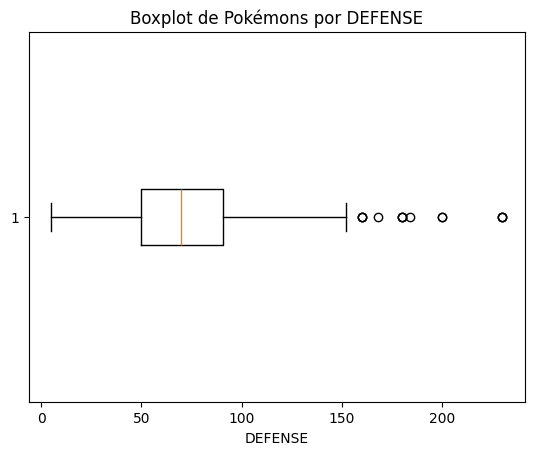

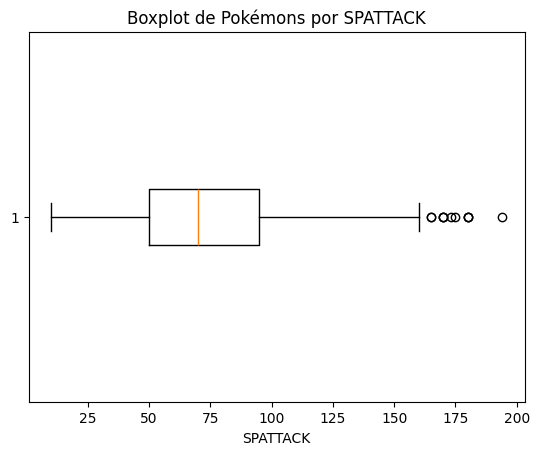

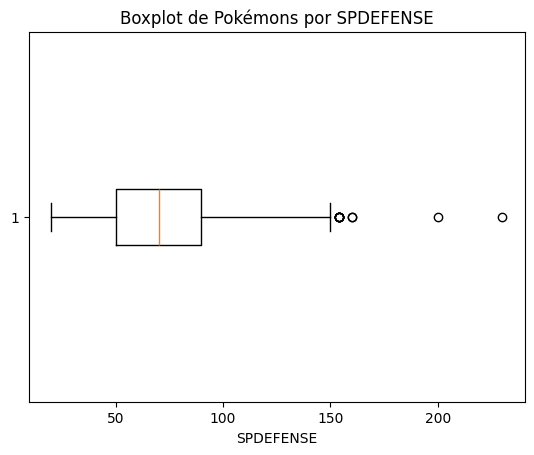

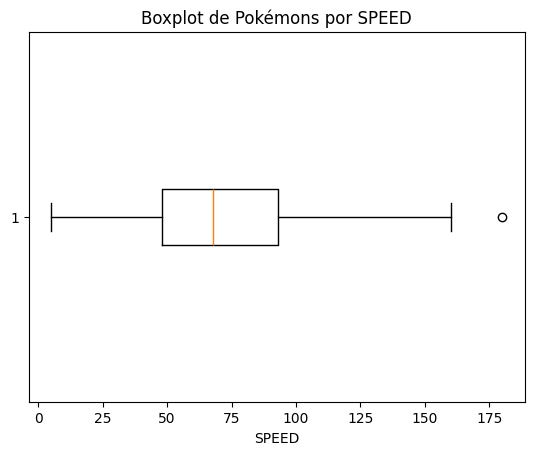

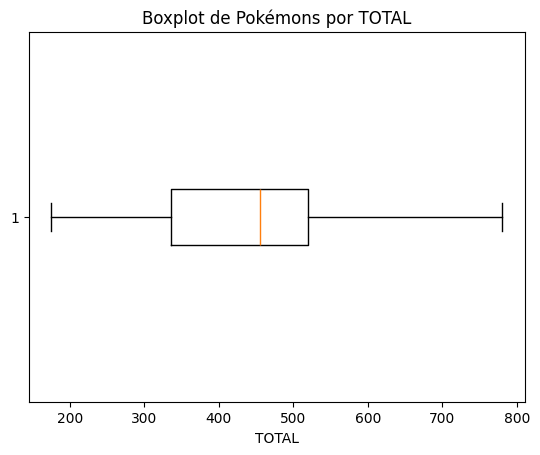

In [149]:
for i, stat in enumerate(stats):
    data = df[stat].dropna()

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    dist_interq = Q3-Q1

    # limite da cauda
    li = Q1 - 1.5 * dist_interq
    Li = Q3 + 1.5 * dist_interq

    outliers = data[(data < li) | (data > Li)]

    plt.boxplot(data, vert=False)
    plt.xlabel(stat.upper())
    plt.title(f'Boxplot de Pokémons por {stat.upper()}')

    plt.show()

In [87]:
df[df['speed'] == 180]

,ndex,species,forme,type1,type2,hp,attack,defense,spattack,spdefense,speed,total,weight,height,pre-evolution
902,386,Deoxys,Deoxys (Speed Forme),Psychic,NaN,50,95,90,95,90,180,600,134.0 lbs.,"5'07""",NaN


A finura das barrinhas deixa evidente que a gente precisa dividir em classes. (valores "continuos")
### 3) Divisão em Classes pra cada STAT

### 4) Análise de Frequência dos TIPOS e STATS

In [88]:
# quão comum é cada tipo?
tipo1_Fi = df['type1'].value_counts() # absoluta
tipo1_fi = df['type1'].value_counts(normalize=True)
tipo1_fai = tipo1_fi.cumsum()

tipo2_Fi = df['type2'].value_counts() # absoluta
tipo2_fi = df['type2'].value_counts(normalize=True)
tipo2_fai = tipo2_fi.cumsum()

tipo1_freq = pd.DataFrame({'Fi': tipo1_Fi,
                                  'fi': tipo1_fi,
                                  'fai': tipo1_fai})

tipo2_freq = pd.DataFrame({'Fi': tipo2_Fi,
                                  'fi': tipo2_fi,
                                  'fai': tipo2_fai})

In [89]:
tipo1_freq

,Fi,fi,fai
type1,,,
Water,130,0.122526,0.122526
Normal,126,0.118756,0.241282
Bug,106,0.099906,0.341188
Psychic,93,0.087653,0.428841
Grass,87,0.081998,0.510839
Rock,67,0.063148,0.573987
Fire,61,0.057493,0.631480
Electric,57,0.053723,0.685203
Ghost,42,0.039585,0.724788


In [90]:
tipo2_freq

,Fi,fi,fai
type2,,,
Flying,140,0.260223,0.260223
Ground,42,0.078067,0.338290
Fairy,39,0.072491,0.410781
Psychic,36,0.066914,0.477695
Poison,35,0.065056,0.542751
Fighting,34,0.063197,0.605948
Steel,33,0.061338,0.667286
Grass,32,0.059480,0.726766
Dark,22,0.040892,0.767658


In [91]:
# como analisar essa distribuição?
tipo1_freq.describe() # nao conclui muita coisa.

,Fi,fi,fai
count,18.000000,18.000000,18.000000
mean,58.944444,0.055556,0.685622
std,35.404340,0.033369,0.266653
min,6.000000,0.005655,0.122526
25%,34.750000,0.032752,0.526626
50%,42.000000,0.039585,0.744581
75%,82.000000,0.077286,0.897738
max,130.000000,0.122526,1.000000


In [92]:
tipo2_freq.describe()

,Fi,fi,fai
count,18.000000,18.000000,18.000000
mean,29.888889,0.055556,0.725733
std,29.724003,0.055249,0.236817
min,5.000000,0.009294,0.260223
25%,15.000000,0.027881,0.558550
50%,21.000000,0.039033,0.786245
75%,34.750000,0.064591,0.920539
max,140.000000,0.260223,1.000000


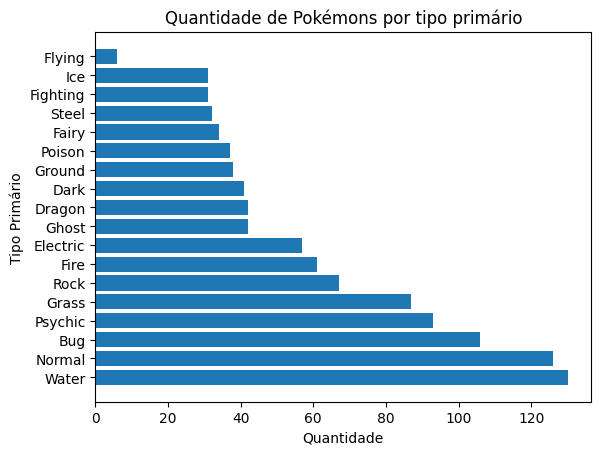

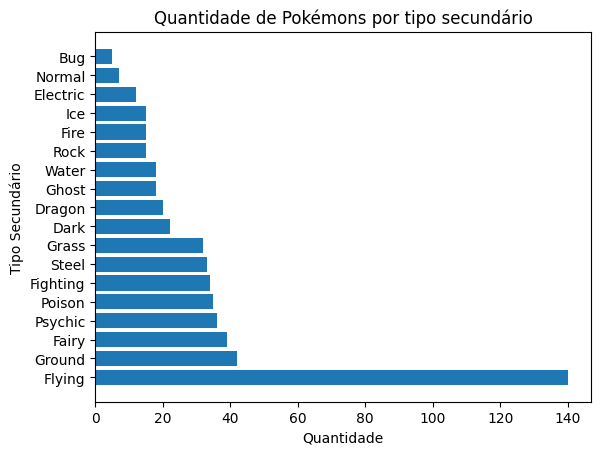

In [93]:
plt.barh(tipo1_Fi.index, tipo1_Fi.values)
plt.xlabel('Quantidade')
plt.ylabel('Tipo Primário')
plt.title('Quantidade de Pokémons por tipo primário')
plt.show()

plt.barh(tipo2_Fi.index, tipo2_Fi.values)
plt.xlabel('Quantidade')
plt.ylabel('Tipo Secundário')
plt.title('Quantidade de Pokémons por tipo secundário')
plt.show()

In [94]:
# precisamos analisar a quantidade de cada tipo por geracao!

### Ta vendo que irado? so tem 6 pokemons que o tipo principal é flying. Agora, quem são eles? os Outliers, boxplot talvez seja interessante.
<s>-> se alguem conseguir seria legal tambem ter graficos aqui!</s>